<a href="https://colab.research.google.com/github/MinJi12345678/Source-Code/blob/main/24_03_22_%EA%B9%80%EC%84%B8%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. 한글

In [ ]:
# Linux Package Installation
!apt-get -qq -y install fonts-nanum > /dev/null

# Delete Cache
!rm -rf ~/.cache/matplotlib -rf

In [ ]:
import os

os.kill(os.getpid(), 9)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 마이너스 폰트 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 전역폰트 지정
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#패션데이터

##1. Data Load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

DF = pd.read_csv('/content/drive/MyDrive/5조/03. 데이터/패션 데이터/230215.csv')

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858215 entries, 0 to 858214
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   category_large_desc   858215 non-null  object
 1   category_middle_desc  858215 non-null  object
 2   category_small_desc   858215 non-null  object
 3   item                  676959 non-null  object
 4   color                 711970 non-null  object
 5   use                   242476 non-null  object
 6   material              755054 non-null  object
 7   print_pattern         368166 non-null  object
 8   characteristic        547034 non-null  object
 9   detail                589722 non-null  object
 10  age                   3784 non-null    object
 11  weight                41831 non-null   object
 12  season                830 non-null     object
 13  sensibility           603684 non-null  object
 14  sale_price            858215 non-null  int64 
 15  recent_sale_count

In [ ]:
DF.head()

,category_large_desc,category_middle_desc,category_small_desc,item,color,use,material,print_pattern,characteristic,detail,age,weight,season,sensibility,sale_price,recent_sale_count
0,여성복,원피스,점프슈트,바람막이/반바지/여름점프수트/반팔점프수트/반바지점프수트/점프수트,베이지/블랙,NaN,코튼/폴리에스터/스판/나일론,체크,NaN,NaN,NaN,NaN,NaN,NaN,28800,0
1,여성복,원피스,점프슈트,점프수트/오버롤팬츠/데님점프수트/데일리점프수트,NaN,NaN,데님/코튼/폴리에스터/나일론,체크,빈티지,스트링/오버롤/자수/워싱,NaN,NaN,NaN,레이어드/귀여운,28800,0
2,여성복,원피스,점프슈트,포켓점프수트/점프수트/데님점프수트/데일리점프수트,NaN,NaN,데님/코튼/폴리에스터/나일론,NaN,NaN,스트링/오버롤,NaN,NaN,NaN,귀여운,28800,0
3,여성복,원피스,점프슈트,스트링점프수트/반팔점프수트/반바지/반바지점프수트/점프수트/칼라점프슈트/데일리점프수트,베이지/블랙/그레이,캠핑룩,폴리에스터/아크릴/나일론,체크,NaN,루즈핏/스트링,NaN,NaN,NaN,활동적인,35800,0
4,여성복,원피스,점프슈트,NaN,베이지/블랙/화이트/아이보리/카키,NaN,폴리에스터/나일론,별,시원한,루즈핏/슬림핏/스트링/커팅,NaN,NaN,NaN,캐주얼한,28800,1


##2. 결측치 처리

In [ ]:
DF.isna().sum(axis = 0)

category_large_desc          0
category_middle_desc         0
category_small_desc          0
item                    181256
color                   146245
use                     615739
material                103161
print_pattern           490049
characteristic          311181
detail                  268493
age                     854431
weight                  816384
season                  857385
sensibility             254531
sale_price                   0
recent_sale_count            0
dtype: int64

In [ ]:
DF.drop(columns = ['category_large_desc', 'color', 'use', 'material', 'print_pattern', 'characteristic',
                   'detail', 'age', 'weight', 'season', 'sensibility', 'sale_price'], inplace = True)

In [ ]:
DF.head()

,category_middle_desc,category_small_desc,item,recent_sale_count
0,원피스,점프슈트,바람막이/반바지/여름점프수트/반팔점프수트/반바지점프수트/점프수트,0
1,원피스,점프슈트,점프수트/오버롤팬츠/데님점프수트/데일리점프수트,0
2,원피스,점프슈트,포켓점프수트/점프수트/데님점프수트/데일리점프수트,0
3,원피스,점프슈트,스트링점프수트/반팔점프수트/반바지/반바지점프수트/점프수트/칼라점프슈트/데일리점프수트,0
4,원피스,점프슈트,NaN,1


In [ ]:
DF['category_middle_desc'].value_counts()

상의     372183
아우터    167236
원피스    137391
팬츠     114182
스커트     67223
Name: category_middle_desc, dtype: int64

In [ ]:
DF['category_small_desc'].value_counts()

티셔츠         153295
롱원피스        102178
블라우스/셔츠      99994
니트           99703
자켓           66168
카디건          53175
데님팬츠         48047
면바지          43986
롱스커트         39142
점퍼           30009
미니원피스        21066
뷔스티에/베스트     19191
코트           17884
반바지          15526
플레어스커트       11105
H라인스커트        9951
점프슈트          7221
플리츠스커트        3972
조거팬츠          3955
코듀로이팬츠        2382
미니스커트         1477
리넨원피스         1357
니트원피스         1352
플리츠원피스        1116
머메이드스커트        961
스퀘어넥원피스        878
트위드원피스         807
데님스커트          615
뷔스티에원피스        592
랩원피스           440
슬랙스            286
셔츠원피스          214
쉬폰원피스          109
데님원피스           61
Name: category_small_desc, dtype: int64

In [ ]:
DF['item'].fillna(DF['category_small_desc'], inplace = True)

DF.head()

,category_middle_desc,category_small_desc,item,recent_sale_count
0,원피스,점프슈트,바람막이/반바지/여름점프수트/반팔점프수트/반바지점프수트/점프수트,0
1,원피스,점프슈트,점프수트/오버롤팬츠/데님점프수트/데일리점프수트,0
2,원피스,점프슈트,포켓점프수트/점프수트/데님점프수트/데일리점프수트,0
3,원피스,점프슈트,스트링점프수트/반팔점프수트/반바지/반바지점프수트/점프수트/칼라점프슈트/데일리점프수트,0
4,원피스,점프슈트,점프슈트,1


In [ ]:
DF.isna().sum(axis = 0)

category_middle_desc    0
category_small_desc     0
item                    0
recent_sale_count       0
dtype: int64

In [ ]:
DF1 = DF[DF['recent_sale_count'] >= 1]

In [ ]:
DF1.groupby(['category_middle_desc'])['recent_sale_count'].sum()

category_middle_desc
상의     19224
스커트     3779
아우터     7521
원피스     4101
팬츠      5867
Name: recent_sale_count, dtype: int64

In [ ]:
DF1.groupby(['category_small_desc'])['recent_sale_count'].sum()

category_small_desc
H라인스커트       268
니트          4729
니트원피스         88
데님스커트         15
데님원피스          8
데님팬츠        3243
랩원피스           5
롱스커트        2482
롱원피스        3288
리넨원피스          2
머메이드스커트       53
면바지         2179
미니스커트         24
미니원피스        340
반바지          206
뷔스티에/베스트    1361
뷔스티에원피스      111
블라우스/셔츠     3946
셔츠원피스          6
쉬폰원피스         18
스퀘어넥원피스        8
슬랙스           22
자켓          3554
점퍼           929
점프슈트         124
조거팬츠         155
카디건         2754
코듀로이팬츠        62
코트           284
트위드원피스        91
티셔츠         9188
플레어스커트       362
플리츠스커트       575
플리츠원피스        12
Name: recent_sale_count, dtype: int64

## 3. 시각화

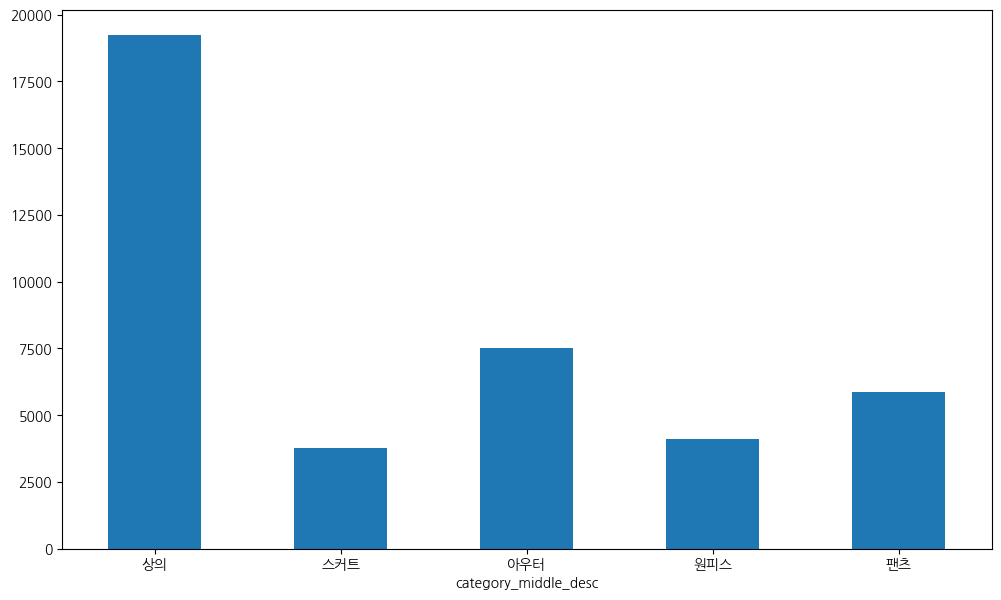

In [ ]:
DF1.groupby(['category_middle_desc'])['recent_sale_count'].sum().plot.bar(rot = 0 , figsize=(12,7));

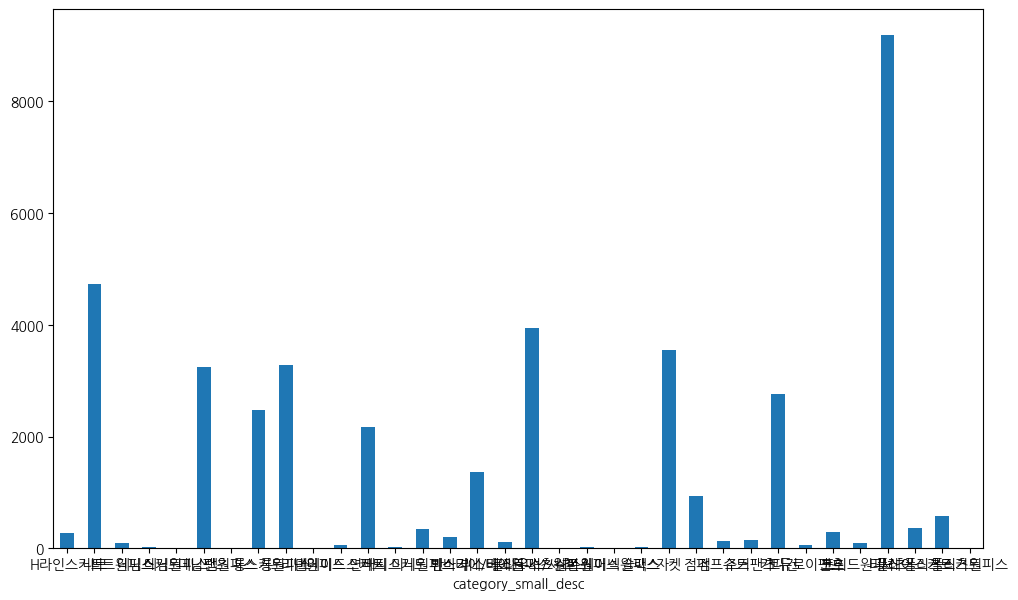

In [ ]:
DF1.groupby(['category_small_desc'])['recent_sale_count'].sum().plot.bar(rot = 0 , figsize=(12,7));

#날씨

In [ ]:
DF_W = pd.read_csv('/content/drive/MyDrive/5조/03. 데이터/날씨 데이터/23.03.21~24.03.20.csv', encoding='CP949')

In [ ]:
DF_W.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   일시       8761 non-null   object 
 1   기온(°C)   8761 non-null   float64
 2   강수량(mm)  1144 non-null   float64
 3   풍속(m/s)  8693 non-null   float64
 4   습도(%)    8761 non-null   int64  
 5   적설(cm)   423 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 410.8+ KB


In [ ]:
import datetime